In [231]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [232]:
import matplotlib as plt
%matplotlib inline


import seaborn as sns

**Reading the train and test csv files**

In [233]:
df_train=pd.read_csv("/kaggle/input/titanic/train.csv")
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [234]:
df_test=pd.read_csv("/kaggle/input/titanic/test.csv")
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


**Data Preprocessing for train data**

In [235]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [236]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Working on empty Age values**

In [237]:
df_train[df_train.Age.isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [238]:
male_age1=df_train[(df_train.Survived==1) & (df_train.Sex=='male') & (df_train.Age.notnull())]['Age'].median()
male_age1

28.0

In [239]:
df_train[(df_train.Survived==1) & (df_train.Sex=='male') & (df_train.Age.notnull())]['Age'].mean()

27.276021505376345

In [240]:
df_train[(df_train.Survived==0) & (df_train.Sex=='male') & (df_train.Age.notnull())]['Age'].mean()

31.618055555555557

In [241]:
male_age0=df_train[(df_train.Survived==0) & (df_train.Sex=='male') & (df_train.Age.notnull())]['Age'].median()
male_age0

29.0

In [242]:
female_age1=df_train[(df_train.Survived==1) & (df_train.Sex=='female') & (df_train.Age.notnull())]['Age'].median()
female_age1

28.0

In [243]:
female_age0=df_train[(df_train.Survived==0) & (df_train.Sex=='female') & (df_train.Age.notnull())]['Age'].median()
female_age0

24.5

In [244]:
import math

In [245]:
def set_age_values(x):
    if math.isnan(x):
        return male_age1
    else:
        return x

In [246]:
df_train.loc[(df_train.Survived==1) & (df_train.Sex=='male') & (df_train.Age.isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
107,108,1,3,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,7.7750,NaN,S
298,299,1,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.5000,C106,S
301,302,1,3,"McCoy, Mr. Bernard",male,NaN,2,0,367226,23.2500,NaN,Q
444,445,1,3,"Johannesen-Bratthammer, Mr. Bernt",male,NaN,0,0,65306,8.1125,NaN,S
507,508,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S
547,548,1,2,"Padro y Manent, Mr. Julian",male,NaN,0,0,SC/PARIS 2146,13.8625,NaN,C


In [247]:
df_train.loc[(df_train.Survived==1) & (df_train.Sex=='male') & (df_train.Age.isnull()),'Age']=df_train[(df_train.Survived==1) & (df_train.Sex=='male') & (df_train.Age.isnull())]['Age'].apply(set_age_values)

In [248]:
def set_mage_values0(x):
    if math.isnan(x):
        return male_age0
    else:
        return x

In [249]:
df_train.loc[(df_train.Survived==0) & (df_train.Sex=='male') & (df_train.Age.isnull()),'Age']=df_train[(df_train.Survived==0) & (df_train.Sex=='male') & (df_train.Age.isnull())]['Age'].apply(set_mage_values0)

In [250]:
def set_fage_values1(x):
    if math.isnan(x):
        return female_age1
    else:
        return x

In [251]:
df_train.loc[(df_train.Survived==1) & (df_train.Sex=='female') & (df_train.Age.isnull()),'Age']=df_train[(df_train.Survived==1) & (df_train.Sex=='female') & (df_train.Age.isnull())]['Age'].apply(set_fage_values1)

In [252]:
def set_fage_values0(x):
    if math.isnan(x):
        return female_age0
    else:
        return x

In [253]:
df_train.loc[(df_train.Survived==0) & (df_train.Sex=='female') & (df_train.Age.isnull()),'Age']=df_train[(df_train.Survived==0) & (df_train.Sex=='female') & (df_train.Age.isnull())]['Age'].apply(set_fage_values0)

In [254]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [255]:
#Since Cabin has large count of values empty, so checking the percentage
(df_train.Cabin.isnull().sum()/df_train.Cabin.shape)*100

array([77.1043771])

In [256]:
#Drop Cabin
df_train.drop('Cabin',axis=1, inplace=True)

In [257]:
df_train.Embarked = df_train.Embarked.fillna(df_train['Embarked'].mode()[0])

**After fixing age,embarked and dropping cabin, train data seems free from missing values**

In [258]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.416016,13.027527,0.42,22.0000,29.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [259]:
df_train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Embarked       891
dtype: int64

**Now fix the issues in test data**

In [260]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [261]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [262]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Fixing age in test data**

In [263]:
female_age=df_test[(df_test.Sex=='female') & (df_test.Age.notnull())]['Age'].median()
male_age=df_test[(df_test.Sex=='male') & (df_test.Age.notnull())]['Age'].median()

In [264]:
def set_maleage(x):
    if math.isnan(x):
        return male_age
    else:
        return x

In [265]:
def set_femaleage(x):
    if math.isnan(x):
        return female_age
    else:
        return x

In [266]:
df_test.loc[(df_test.Sex=='female') & (df_test.Age.isnull()),'Age']=df_test[(df_test.Sex=='female') & (df_test.Age.isnull())]['Age'].apply(set_femaleage)

In [267]:
df_test.loc[(df_test.Sex=='male') & (df_test.Age.isnull()),'Age']=df_test[(df_test.Sex=='male') & (df_test.Age.isnull())]['Age'].apply(set_maleage)

In [268]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [269]:
#Since Cabin has large count of values empty, so checking the percentage
(df_test.Cabin.isnull().sum()/df_test.Cabin.shape)*100

array([78.22966507])

In [270]:
#Drop Cabin
df_test.drop('Cabin',axis=1, inplace=True)

In [271]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [272]:
df_test[df_test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [273]:
df_test[df_test.Pclass==3]['Fare'].median()

7.8958

In [274]:
df_test.fillna(df_test[df_test.Pclass==3]['Fare'].median(), inplace=True)

In [275]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Now we have train data and test data is free from missing values**

**Feature Engineering and dropping unecessary columns from train and test data**

In [276]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [277]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


**Ticket,Name and PassengerId can be dropped**

In [278]:
df_train.drop(['PassengerId','Ticket', 'Name'],axis=1, inplace=True)

In [279]:
df_test.drop(['PassengerId','Ticket', 'Name'],axis=1, inplace=True)

In [280]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [281]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


**Now we have to convert Sex and Embarked column values into numerical format**

**Main objective to bring all data to numeric format**

In [282]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']+1

In [283]:
df_train.drop(['SibSp','Parch'], axis=1, inplace=True)

In [284]:
df_train['GenderClass'] = df_train.apply(lambda x: 'child' if x['Age'] < 15 else x['Sex'],axis=1)

In [285]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,GenderClass
0,0,3,male,22.0,7.2500,S,2,male
1,1,1,female,38.0,71.2833,C,2,female
2,1,3,female,26.0,7.9250,S,1,female
3,1,1,female,35.0,53.1000,S,2,female
4,0,3,male,35.0,8.0500,S,1,male


In [286]:
df_train = pd.get_dummies(df_train, columns=['GenderClass','Embarked'])

In [287]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,GenderClass_child,GenderClass_female,GenderClass_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,7.2500,2,0,0,1,0,0,1
1,1,1,female,38.0,71.2833,2,0,1,0,1,0,0
2,1,3,female,26.0,7.9250,1,0,1,0,0,0,1
3,1,1,female,35.0,53.1000,2,0,1,0,0,0,1
4,0,3,male,35.0,8.0500,1,0,0,1,0,0,1


In [288]:
df_train.drop(['Sex','Age','GenderClass_child','Embarked_C'], axis=1, inplace=True)

In [289]:
df_train.head()

,Survived,Pclass,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,0,3,7.2500,2,0,1,0,1
1,1,1,71.2833,2,1,0,0,0
2,1,3,7.9250,1,1,0,0,1
3,1,1,53.1000,2,1,0,0,1
4,0,3,8.0500,1,0,1,0,1


In [290]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived              891 non-null int64
Pclass                891 non-null int64
Fare                  891 non-null float64
FamilySize            891 non-null int64
GenderClass_female    891 non-null uint8
GenderClass_male      891 non-null uint8
Embarked_Q            891 non-null uint8
Embarked_S            891 non-null uint8
dtypes: float64(1), int64(3), uint8(4)
memory usage: 31.4 KB


**Now update test data similar to what we did to train data**

In [291]:
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch']+1

In [292]:
df_test.drop(['SibSp','Parch'], axis=1, inplace=True)

In [293]:
df_test['GenderClass'] = df_test.apply(lambda x: 'child' if x['Age'] < 15 else x['Sex'],axis=1)

In [294]:
df_test = pd.get_dummies(df_test, columns=['GenderClass','Embarked'])

In [295]:
df_test.drop(['Sex','Age','GenderClass_child','Embarked_C'], axis=1, inplace=True)

In [296]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass                418 non-null int64
Fare                  418 non-null float64
FamilySize            418 non-null int64
GenderClass_female    418 non-null uint8
GenderClass_male      418 non-null uint8
Embarked_Q            418 non-null uint8
Embarked_S            418 non-null uint8
dtypes: float64(1), int64(2), uint8(4)
memory usage: 11.6 KB


**Visualize the data**

In [297]:
df_test.head()

,Pclass,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,3,7.8292,1,0,1,1,0
1,3,7.0000,2,1,0,0,1
2,2,9.6875,1,0,1,1,0
3,3,8.6625,1,0,1,0,1
4,3,12.2875,3,1,0,0,1


In [298]:
df_train.head()

,Survived,Pclass,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,0,3,7.2500,2,0,1,0,1
1,1,1,71.2833,2,1,0,0,0
2,1,3,7.9250,1,1,0,0,1
3,1,1,53.1000,2,1,0,0,1
4,0,3,8.0500,1,0,1,0,1


**For classification, features should have not strong correlation between each other**

In [299]:
df_train_corr=df_train.corr()

In [300]:
df_train_corr

,Survived,Pclass,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,0.257307,0.016639,0.516808,-0.559161,0.003650,-0.149683
Pclass,-0.338481,1.000000,-0.549500,0.065997,-0.174101,0.095979,0.221009,0.074053
Fare,0.257307,-0.549500,1.000000,0.217138,0.195952,-0.183266,-0.117216,-0.162184
FamilySize,0.016639,0.065997,0.217138,1.000000,0.104316,-0.346753,-0.058592,0.077359
GenderClass_female,0.516808,-0.174101,0.195952,0.104316,1.000000,-0.824859,0.105792,-0.121796
GenderClass_male,-0.559161,0.095979,-0.183266,-0.346753,-0.824859,1.000000,-0.077532,0.102450
Embarked_Q,0.003650,0.221009,-0.117216,-0.058592,0.105792,-0.077532,1.000000,-0.499421
Embarked_S,-0.149683,0.074053,-0.162184,0.077359,-0.121796,0.102450,-0.499421,1.000000


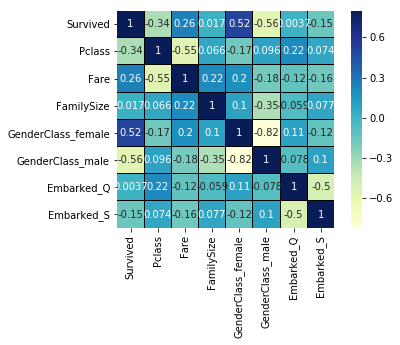

In [301]:

sns.heatmap(df_train_corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')


Pclass is negatively correlated with Survived

Fare is negatively correlated with Survived

This means people with low Fare and low Pclass might not have survived much.

Survived has better correlation with genderclass_female as compared to genderclass_male, this means females survived more as compared to male

In [302]:
df_train[(df_train.Survived==1) & (df_train.GenderClass_female==1)].count()

Survived              209
Pclass                209
Fare                  209
FamilySize            209
GenderClass_female    209
GenderClass_male      209
Embarked_Q            209
Embarked_S            209
dtype: int64

In [303]:
df_train[(df_train.Survived==1) & (df_train.GenderClass_female==0)].count()

Survived              133
Pclass                133
Fare                  133
FamilySize            133
GenderClass_female    133
GenderClass_male      133
Embarked_Q            133
Embarked_S            133
dtype: int64

In [304]:
df_train[(df_train.Survived==1) & (df_train.GenderClass_male==1)].count()

Survived              88
Pclass                88
Fare                  88
FamilySize            88
GenderClass_female    88
GenderClass_male      88
Embarked_Q            88
Embarked_S            88
dtype: int64

So around 88 males survived as compared to 209 females

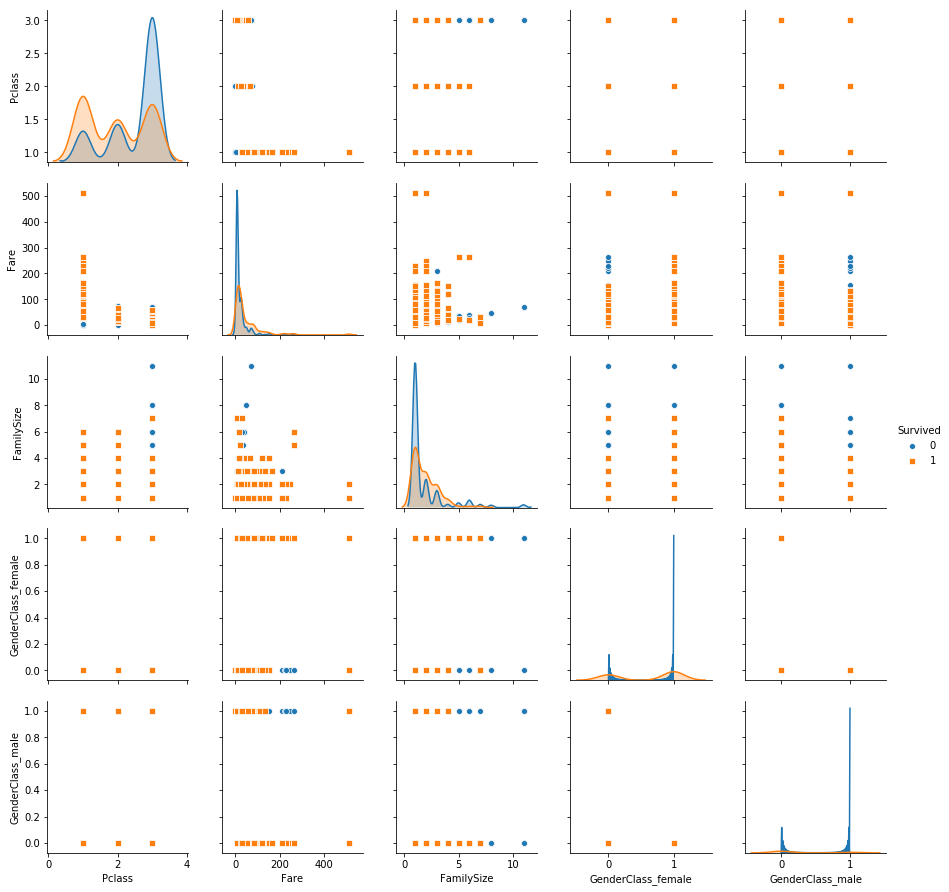

In [305]:
sns.pairplot(df_train[["Survived","Pclass","Fare","FamilySize","GenderClass_female","GenderClass_male"]],vars = ["Pclass","Fare","FamilySize","GenderClass_female","GenderClass_male"],
             hue="Survived", markers=["o", "s"], diag_kind='kde')


The passenger with small family size died more

Passenger with class 3 died more as compared to class 1 and  class 2

In [306]:
df_train.Survived.mean()

0.3838383838383838

In [307]:
df_train.Survived.median()

0.0

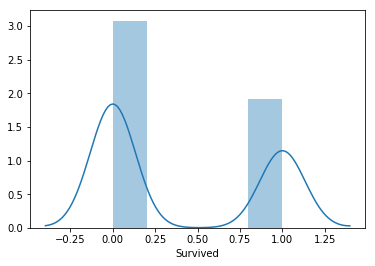

In [308]:
sns.distplot(df_train.Survived, kde=True)

**Survived seems to be normalized**

**Now visualize the test data**

In [309]:
df_test_corr=df_test.corr()
df_test_corr

,Pclass,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
Pclass,1.000000,-0.577488,0.012736,-0.133693,0.066023,0.252608,0.120783
Fare,-0.577488,1.000000,0.250417,0.207831,-0.200231,-0.155075,-0.179292
FamilySize,0.012736,0.250417,1.000000,0.095014,-0.283526,-0.144233,0.106421
GenderClass_female,-0.133693,0.207831,0.095014,1.000000,-0.852888,0.139187,-0.131756
GenderClass_male,0.066023,-0.200231,-0.283526,-0.852888,1.000000,-0.096116,0.086022
Embarked_Q,0.252608,-0.155075,-0.144233,0.139187,-0.096116,1.000000,-0.474962
Embarked_S,0.120783,-0.179292,0.106421,-0.131756,0.086022,-0.474962,1.000000


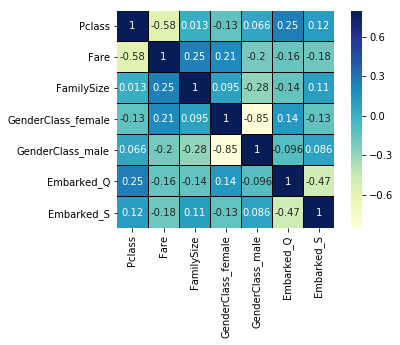

In [310]:
sns.heatmap(df_test_corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')

In [311]:
df_test[(df_test.GenderClass_female==1)].count()

Pclass                140
Fare                  140
FamilySize            140
GenderClass_female    140
GenderClass_male      140
Embarked_Q            140
Embarked_S            140
dtype: int64

In [312]:
df_test[(df_test.GenderClass_female==0)].count()

Pclass                278
Fare                  278
FamilySize            278
GenderClass_female    278
GenderClass_male      278
Embarked_Q            278
Embarked_S            278
dtype: int64

In [313]:
df_test[(df_test.GenderClass_male==1)].count()

Pclass                247
Fare                  247
FamilySize            247
GenderClass_female    247
GenderClass_male      247
Embarked_Q            247
Embarked_S            247
dtype: int64

**In test data, we have

140 females

247 males

278-247 = 31 child

**Splitting the data**

In [314]:
X_train=df_train.loc[:,df_train.columns!='Survived']
X_train

,Pclass,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,3,7.2500,2,0,1,0,1
1,1,71.2833,2,1,0,0,0
2,3,7.9250,1,1,0,0,1
3,1,53.1000,2,1,0,0,1
4,3,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...
886,2,13.0000,1,0,1,0,1
887,1,30.0000,1,1,0,0,1
888,3,23.4500,4,1,0,0,1
889,1,30.0000,1,0,1,0,0


In [315]:
y_train=df_train.Survived
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [316]:
X_test=df_test
X_test

,Pclass,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,3,7.8292,1,0,1,1,0
1,3,7.0000,2,1,0,0,1
2,2,9.6875,1,0,1,1,0
3,3,8.6625,1,0,1,0,1
4,3,12.2875,3,1,0,0,1
...,...,...,...,...,...,...,...
413,3,8.0500,1,0,1,0,1
414,1,108.9000,1,1,0,0,0
415,3,7.2500,1,0,1,0,1
416,3,8.0500,1,0,1,0,1


In [317]:
print(X_train.shape)
print(y_train.shape)

(891, 7)
(891,)


In [318]:
print(X_test.shape)

(418, 7)


[](http://)**Applying model**

In [322]:
from sklearn.model_selection import GridSearchCV

#from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
grid={"C":np.logspace(-3,3,7), 
      "penalty":["l1","l2"], 
      "tol":[0.01,0.001,0.0001]}# l1 lasso l2 ridge

#logreg=LogisticRegression()
#logreg_cv=GridSearchCV(logreg,grid,cv=10)
decision_tree = DecisionTreeClassifier()

#dcs_cv=GridSearchCV(decision_tree,grid,cv=10)

In [325]:
#logreg_cv
decision_tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [326]:
#logreg_cv.fit(X_train,y_train)
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
#logreg_cv.best_params_

In [ ]:
#logreg_cv.best_score_

In [ ]:
#y_pred_train = logreg_cv.predict(X_train)

In [327]:
y_pred_train =decision_tree.predict(X_train)

In [328]:
y_pred_train

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [ ]:
#logreg_cv.predict_proba(X_train)[0]

In [331]:
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

92.59

In [332]:
Y_pred = decision_tree.predict(X_test)

In [ ]:
#Y_pred = logreg_cv.predict(X_test)

In [333]:
Y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [334]:
df_test_tmp=pd.read_csv("/kaggle/input/titanic/test.csv")

In [335]:
df_test_tmp.shape

(418, 11)

In [336]:
Y_pred.shape

(418,)

In [337]:
Submission = pd.DataFrame({ 'PassengerId': df_test_tmp['PassengerId'],'Survived': Y_pred })

In [338]:
Submission.to_csv('submission_new.csv', index=False)